# Tow-Yo CTD Data Parsing

### Import and clean unbinned data

In [15]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import unbinned data as CSV file
df = pd.read_csv('YOUR_FILE_NAME_HERE.csv')

In [3]:
#Check data import
df.head()

,Depth [m],Pressure [db],"Temperature [ITS-90, deg C]",Conductivity [S/m],Salinity [PSU],"Density [sigma-theta, kg/m^3]","Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]","Beam Transmission, WET Labs C-Star [%]","Beam Attenuation, WET Labs C-Star [1/m]","Oxygen, SBE 43 [umol/kg]","Time, Elapsed [minutes]",Latitude [deg],Longitude [deg]
0,1.152,1.159,26.9089,1.109874,6.0426,1.0671,-0.2534,94.0726,0.2444,243.296,0.0000,10.33738,-117.19008
1,1.152,1.159,26.9089,1.109675,6.0414,1.0662,-0.2534,94.0726,0.2444,243.298,0.0007,10.33738,-117.19008
2,1.191,1.198,26.9089,1.109942,6.0430,1.0674,-0.2534,94.0726,0.2444,243.296,0.0014,10.33738,-117.19008
3,1.099,1.105,26.9085,1.110464,6.0461,1.0698,-0.2534,94.0726,0.2444,243.291,0.0021,10.33738,-117.19008
4,1.152,1.159,26.9085,1.111003,6.0493,1.0722,-0.2534,94.0726,0.2444,243.287,0.0028,10.33738,-117.19008


In [4]:
#Check dataframe size
df.shape

(565674, 13)

In [5]:
# Remove rows of data with 'Bad_flags' (i.e,-9.990e-29 values)

# Replace -9.990e-29 values with empty cells
columns = df.columns.tolist()
for x in columns:
    df.loc[df[x] == -9.990e-29, x] = ''

# Drop rows with empty cells
df = df.dropna()

In [6]:
#Check dataframe size - the change in row numbers indicates how much data was dropped
df.shape

(552262, 13)

In [7]:
#Cast all columns to float64 
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.dtypes

Depth [m]                                     float64
Pressure [db]                                 float64
Temperature [ITS-90, deg C]                   float64
Conductivity [S/m]                            float64
Salinity [PSU]                                float64
Density [sigma-theta, kg/m^3]                 float64
Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]    float64
Beam Transmission, WET Labs C-Star [%]        float64
Beam Attenuation, WET Labs C-Star [1/m]       float64
Oxygen, SBE 43 [umol/kg]                      float64
Time, Elapsed [minutes]                       float64
Latitude [deg]                                float64
Longitude [deg]                               float64
dtype: object

### Visually determine up and down casts to create bins

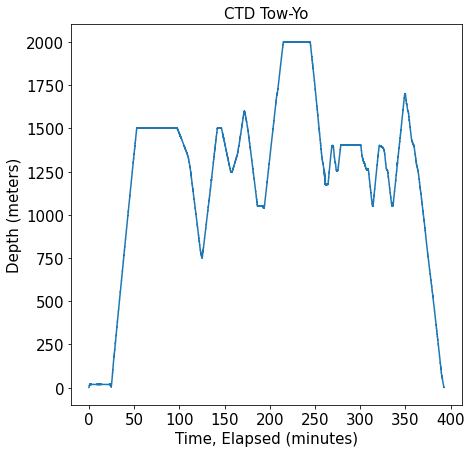

In [16]:
# Generate a line plot of time v. depth to visualize bins
data_plot = df[['Time, Elapsed [minutes]','Depth [m]']]

data_plot.plot(kind="line", x = 'Time, Elapsed [minutes]', y = 'Depth [m]', legend=False, figsize = (7,7))

plt.title("CTD Tow-Yo", fontsize = '15')
plt.ylabel("Depth (meters)", fontsize = '15')
plt.xlabel("Time, Elapsed (minutes)", fontsize = '15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### Use the graph above the create data bins - each bin will be used to create an indiviudal CSV file. In this example, files are created for all up casts, down casts, and "holds" (periods where depth was held constant with time). Enter your time intervals in the "bins" list below (excluding 0), then and give each time interval a unique label by populating the "labels" list. In this example, the first down cast occurs from 0 to 25 minutes and is labeled D1.

In [8]:
#Enter your desired bin time intervals and labels in the bins and labels lists below

bins = [25,53,97,125,141,146,158,172,186,193,215,245,260,266,269,274,279,300,313,322,335,349,393]
labels = ['D1','Hold1','U1','D2','Hold2','U2','D3','U3','Hold3','D4','Hold4','U4','Hold5','D5','U5','D6','Hold6','U6','D7','U7','D8','U8']

#Define bins
df['Cast'] = pd.cut(x=df['Time, Elapsed [minutes]'], bins = bins, labels = labels, include_lowest = True)


In [9]:
#Round data in Pressure column to one decimal place
df["Pressure [db]"]=df["Pressure [db]"].apply(lambda x:round(x,0))

In [10]:
#Build groupby function to cut dataframe into individual casts
#Export individual casts into CSV files
#You may replace CAST# with your unique cast label, bin labels automatically populate to each CSV file
casts = ['D1','Hold1','U1','D2','Hold2','U2','D3','U3','Hold3','D4','Hold4','U4','Hold5','D5','U5','D6','Hold6','U6','D7','U7','D8','U8']
df_out=[]

for c, name in enumerate(casts):
    mask=(df["Cast"])==name
    df_out=df.loc[mask].groupby(["Pressure [db]"],as_index=False).mean()
    df_out["Cast"]=name
    df_out.append(df_out)
    df_out.to_csv("CAST#_"+name+".csv")